I had taken this project from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

The example below loads the MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


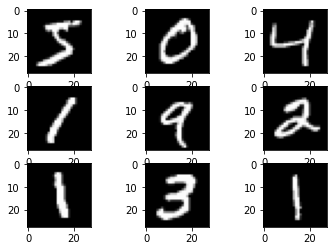

In [2]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import numpy as np

Using TensorFlow backend.


> 97.767
> 98.117
> 97.917
> 98.242
> 98.283


C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


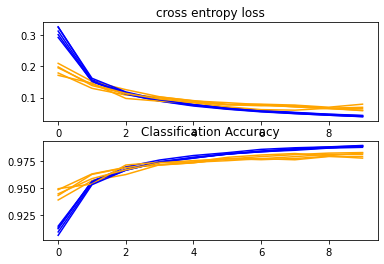

Accuracy: mean=98.065 std=0.196, n=5


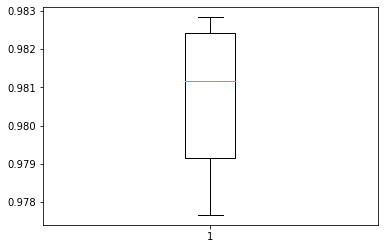

In [6]:
class mnist_classification():
    #load train and test dataset
    def load_dataset(self):
        #load datset
        (trainX,trainy),(testX,testy)=mnist.load_data()
        #reshape datset to have a single channel
        trainX=trainX.reshape((trainX.shape[0],28,28,1))
        testX=testX.reshape((testX.shape[0],28,28,1))
        #one_hot encode traget values
        trainy=to_categorical(trainy)
        testy=to_categorical(testy)
        return trainX,trainy,testX,testy
    
    #scale pixels
    def pep_pixels(self,train,test):
        #conert from integers to float
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        #normalize to range 0-1
        train_norm=train_norm/255.0
        test_norm=test_norm/255.0
        return train_norm,test_norm
    
    #define cnn model
    def define_model(self):
        model=Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        #compile model
        opt=SGD(lr=0.01,momentum=0.09)
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        return model
    
    #evaluate a model using k-fold cross-validation
    def evaluate_model(self,dataX, dataY, n_folds=5):
        scores, histories = list(), list()
        # prepare cross validation
        kfold = KFold(n_folds, shuffle=True, random_state=1)
        # enumerate splits
        for train_ix, test_ix in kfold.split(dataX):
            # define model
            model = self.define_model()
            # select rows for train and test
            trainX, trainy, testX, testy = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
            # fit model
            history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy), verbose=0)
            # evaluate model
            _, acc = model.evaluate(testX, testy, verbose=0)
            print('> %.3f' % (acc * 100.0))
            # stores scores
            scores.append(acc)
            histories.append(history)
        return scores, histories
    
    #plot diagonistic learning curves
    def summarize_diagnostics(self,histories):
        for i in range(len(histories)):
                #plot loss
                pyplot.subplot(211)
                pyplot.title('cross entropy loss')
                pyplot.plot(histories[i].history['loss'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
                #plot accuracy
                pyplot.subplot(212)
                pyplot.title('Classification Accuracy')
                pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
        pyplot.show()
        
    #summarize model performance
    def summarize_performance(self,scores):
        #print summary
        print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100, std(scores)*100,len(scores)))
        #box and whisker plot of results
        pyplot.boxplot(scores)
        pyplot.show()
        
    #run the test harness to evaluate model
    def run_test_harness(self):
        #load dataset
        trainX,trainy,testX,testy= self.load_dataset()
        #prepare pixel data
        trainX,testX=self.pep_pixels(trainX,testX)
        #evaluate model
        scores,histories=self.evaluate_model(trainX,trainy)
        #learning curves
        self.summarize_diagnostics(histories)
        #summarize model performance
        self.summarize_performance(scores)
        
v=mnist_classification()
v.run_test_harness()

## How to Develop an Improved Model
There are many ways that we might explore improvements to the baseline model.

We will look at areas of model configuration that often result in an improvement, so-called low-hanging fruit. The first is a change to the learning algorithm, and the second is an increase in the depth of the model.

Improvement to Learning
There are many aspects of the learning algorithm that can be explored for improvement.

Perhaps the point of biggest leverage is the learning rate, such as evaluating the impact that smaller or larger values of the learning rate may have, as well as schedules that change the learning rate during training.

Another approach that can rapidly accelerate the learning of a model and can result in large performance improvements is batch normalization. We will evaluate the effect that batch normalization has on our baseline model.

Batch normalization can be used after convolutional and fully connected layers. It has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.

We can update the model definition to use batch normalization after the activation function for the convolutional and dense layers of our baseline model. The updated version of define_model() function with batch normalization is listed below.

> 98.550
> 98.358
> 98.500
> 98.692
> 98.625


C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


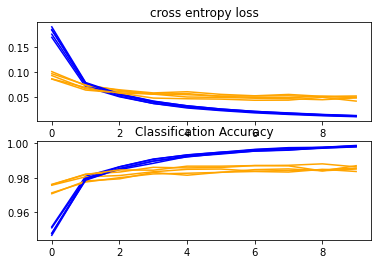

Accuracy: mean=98.545 std=0.114, n=5


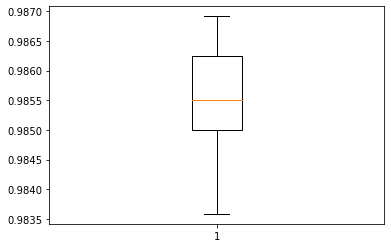

In [9]:
from keras.layers import BatchNormalization
class mnist_classification():
    #load train and test dataset
    def load_dataset(self):
        #load datset
        (trainX,trainy),(testX,testy)=mnist.load_data()
        #reshape datset to have a single channel
        trainX=trainX.reshape((trainX.shape[0],28,28,1))
        testX=testX.reshape((testX.shape[0],28,28,1))
        #one_hot encode traget values
        trainy=to_categorical(trainy)
        testy=to_categorical(testy)
        return trainX,trainy,testX,testy
    
    #scale pixels
    def pep_pixels(self,train,test):
        #conert from integers to float
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        #normalize to range 0-1
        train_norm=train_norm/255.0
        test_norm=test_norm/255.0
        return train_norm,test_norm
    
    #define cnn model
    def define_model(self):
        model=Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Dense(10, activation='softmax'))
        #compile model
        opt=SGD(lr=0.01,momentum=0.09)
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        return model
    
    #evaluate a model using k-fold cross-validation
    def evaluate_model(self,dataX, dataY, n_folds=5):
        scores, histories = list(), list()
        # prepare cross validation
        kfold = KFold(n_folds, shuffle=True, random_state=1)
        # enumerate splits
        for train_ix, test_ix in kfold.split(dataX):
            # define model
            model = self.define_model()
            # select rows for train and test
            trainX, trainy, testX, testy = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
            # fit model
            history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy), verbose=0)
            # evaluate model
            _, acc = model.evaluate(testX, testy, verbose=0)
            print('> %.3f' % (acc * 100.0))
            # stores scores
            scores.append(acc)
            histories.append(history)
        return scores, histories
    
    #plot diagonistic learning curves
    def summarize_diagnostics(self,histories):
        for i in range(len(histories)):
                #plot loss
                pyplot.subplot(211)
                pyplot.title('cross entropy loss')
                pyplot.plot(histories[i].history['loss'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
                #plot accuracy
                pyplot.subplot(212)
                pyplot.title('Classification Accuracy')
                pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
        pyplot.show()
        
    #summarize model performance
    def summarize_performance(self,scores):
        #print summary
        print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100, std(scores)*100,len(scores)))
        #box and whisker plot of results
        pyplot.boxplot(scores)
        pyplot.show()
        
    #run the test harness to evaluate model
    def run_test_harness(self):
        #load dataset
        trainX,trainy,testX,testy= self.load_dataset()
        #prepare pixel data
        trainX,testX=self.pep_pixels(trainX,testX)
        #evaluate model
        scores,histories=self.evaluate_model(trainX,trainy)
        #learning curves
        self.summarize_diagnostics(histories)
        #summarize model performance
        self.summarize_performance(scores)
        
v=mnist_classification()
v.run_test_harness()

we can further increase the accuracy by increasing in model depth
## Increase in Model Depth
There are many ways to change the model configuration in order to explore improvements over the baseline model.

Two common approaches involve changing the capacity of the feature extraction part of the model or changing the capacity or function of the classifier part of the model. Perhaps the point of biggest influence is a change to the feature extractor.

We can increase the depth of the feature extractor part of the model, following a VGG-like pattern of adding more convolutional and pooling layers with the same sized filter, while increasing the number of filters. In this case, we will add a double convolutional layer with 64 filters each, followed by another max pooling layer.

The updated version of the define_model() function with this change is listed below.

> 98.600
> 98.600
> 98.642
> 98.925
> 98.733


C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\91926\AppData\Local\Continuum\anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


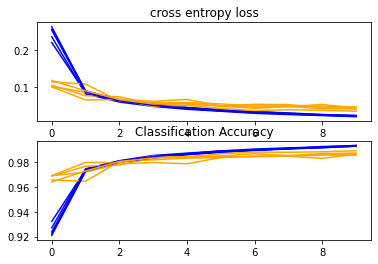

Accuracy: mean=98.700 std=0.123, n=5


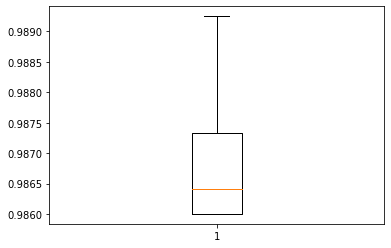

In [11]:
from keras.layers import BatchNormalization
class mnist_classification():
    #load train and test dataset
    def load_dataset(self):
        #load datset
        (trainX,trainy),(testX,testy)=mnist.load_data()
        #reshape datset to have a single channel
        trainX=trainX.reshape((trainX.shape[0],28,28,1))
        testX=testX.reshape((testX.shape[0],28,28,1))
        #one_hot encode traget values
        trainy=to_categorical(trainy)
        testy=to_categorical(testy)
        return trainX,trainy,testX,testy
    
    #scale pixels
    def pep_pixels(self,train,test):
        #conert from integers to float
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        #normalize to range 0-1
        train_norm=train_norm/255.0
        test_norm=test_norm/255.0
        return train_norm,test_norm
    
    #define cnn model
    def define_model(self):
        model=Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(MaxPooling2D(2,2))
        model.add(Flatten())
        model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        #compile model
        opt=SGD(lr=0.01,momentum=0.09)
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        return model
    
    #evaluate a model using k-fold cross-validation
    def evaluate_model(self,dataX, dataY, n_folds=5):
        scores, histories = list(), list()
        # prepare cross validation
        kfold = KFold(n_folds, shuffle=True, random_state=1)
        # enumerate splits
        for train_ix, test_ix in kfold.split(dataX):
            # define model
            model = self.define_model()
            # select rows for train and test
            trainX, trainy, testX, testy = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
            # fit model
            history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy), verbose=0)
            # evaluate model
            _, acc = model.evaluate(testX, testy, verbose=0)
            print('> %.3f' % (acc * 100.0))
            # stores scores
            scores.append(acc)
            histories.append(history)
        return scores, histories
    
    #plot diagonistic learning curves
    def summarize_diagnostics(self,histories):
        for i in range(len(histories)):
                #plot loss
                pyplot.subplot(211)
                pyplot.title('cross entropy loss')
                pyplot.plot(histories[i].history['loss'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
                #plot accuracy
                pyplot.subplot(212)
                pyplot.title('Classification Accuracy')
                pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
                pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
        pyplot.show()
        
    #summarize model performance
    def summarize_performance(self,scores):
        #print summary
        print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100, std(scores)*100,len(scores)))
        #box and whisker plot of results
        pyplot.boxplot(scores)
        pyplot.show()
        
    #run the test harness to evaluate model
    def run_test_harness(self):
        #load dataset
        trainX,trainy,testX,testy= self.load_dataset()
        #prepare pixel data
        trainX,testX=self.pep_pixels(trainX,testX)
        #evaluate model
        scores,histories=self.evaluate_model(trainX,trainy)
        #learning curves
        self.summarize_diagnostics(histories)
        #summarize model performance
        self.summarize_performance(scores)
        
v=mnist_classification()
v.run_test_harness()

## How to Finalize the Model and Make Predictions
The process of model improvement may continue for as long as we have ideas and the time and resources to test them out.

At some point, a final model configuration must be chosen and adopted. In this case, we will choose the deeper model as our final model.

First, we will finalize our model, but fitting a model on the entire training dataset and saving the model to file for later use. We will then load the model and evaluate its performance on the hold out test dataset to get an idea of how well the chosen model actually performs in practice. Finally, we will use the saved model to make a prediction on a single image.

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
class finalize_model():
    #load train and test dataset
    def load_dataset(self):
        #load datset
        (trainX,trainy),(testX,testy)=mnist.load_data()
        #reshape datset to have a single channel
        trainX=trainX.reshape((trainX.shape[0],28,28,1))
        testX=testX.reshape((testX.shape[0],28,28,1))
        #one_hot encode traget values
        trainy=to_categorical(trainy)
        testy=to_categorical(testy)
        return trainX,trainy,testX,testy
    
    #scale pixels
    def pep_pixels(self,train,test):
        #conert from integers to float
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        #normalize to range 0-1
        train_norm=train_norm/255.0
        test_norm=test_norm/255.0
        return train_norm,test_norm
    
    #define cnn model
    def define_model(self):
        model=Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(MaxPooling2D(2,2))
        model.add(Flatten())
        model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        #compile model
        opt=SGD(lr=0.01,momentum=0.09)
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        return model
    
    
    #run the test harness to evaluate model
    def run_test_harness(self):
        #load dataset
        trainX,trainy,testX,testy= self.load_dataset()
        #prepare pixel data
        trainX,testX=self.pep_pixels(trainX,testX)
        # define model
        model =self.define_model()
        # fit model
        model.fit(trainX, trainy, epochs=10, batch_size=32, verbose=0)
        # save model
        model.save('final_model.h5')
        
x=finalize_model()
x.run_test_harness()

In [7]:
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
class finalize_model:
    
    def load_dataset(self):
        #load datset
        (trainX,trainy),(testX,testy)=mnist.load_data()
        #reshape datset to have a single channel
        trainX=trainX.reshape((trainX.shape[0],28,28,1))
        testX=testX.reshape((testX.shape[0],28,28,1))
        #one_hot encode traget values
        trainy=to_categorical(trainy)
        testy=to_categorical(testy)
        return trainX,trainy,testX,testy
    
    #scale pixels
    def pep_pixels(self,train,test):
        #conert from integers to float
        train_norm = train.astype('float32')
        test_norm = test.astype('float32')
        #normalize to range 0-1
        train_norm=train_norm/255.0
        test_norm=test_norm/255.0
        return train_norm,test_norm
    
    #define cnn model
    def define_model(self):
        model=Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
        model.add(MaxPooling2D(2,2))
        model.add(Flatten())
        model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        #compile model
        opt=SGD(lr=0.01,momentum=0.09)
        model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
        return model
    
   
    #run the test harness to evaluate model
    def run_test_harness(self):
        #load dataset
        trainX,trainy,testX,testy= self.load_dataset()
        #prepare pixel data
        trainX,testX=self.pep_pixels(trainX,testX)
       # load model
        model = load_model('final_model.h5')
        # evaluate model on test dataset
        _, acc = model.evaluate(testX, testy, verbose=0)
        print('> %.3f' % (acc * 100.0))
v=finalize_model()
v.run_test_harness()

> 99.130
